We know that the best fit $b = \frac{1}{S_{tt}}$ * $\sum_i \frac{t_i y_i}{\sigma_i}$ and best fit $a = \frac{S_y - S_x b}{S}$

and uncertainties on the parameters $\sigma_a^2 = \frac{1}{S}(1+\frac{S_X^2}{S S_{tt}})$ and $\sigma_b^2 = \frac{1}{S_{tt}}$

with $t_i = \frac{1}{\sigma_i}(x_i - \frac{S_x}{S})$ and $S_{tt} = \sum_i t_i^2$ and $S = \sum_i \frac{1}{\sigma_i^2}$, 
$S_x = \sum_i \frac{x_i}{\sigma_i^2}$, $S_y = \sum_i \frac{y_i}{\sigma_i^2}$, 

So, our pseudo-code:


1.   Open up files with x,y values, storing them
2.   Sx = Sy = S = Stt = a = b = sa2 = sb2 = 0
3.   Loop over triplets of values (xi,yi,si):
          If (si < epsilon): Break and complain (tiny error)
          Else: Sx += xi/si^2, Sy += yi/si^2, S += 1/si^2
4.   Loop again over triplets of values (x,y,si):
          ti = 1/si*(xi-Sx/S)
          Stt += ti*ti
          b = b + ti*yi/si
5.   if (S < epsilon): break and complain 
     else:
          a = (Sy - Sx*b)/S
          b = b/Stt ### normalize it outside the loop
          sa2 = (1/S)*(1+(Sx*Sx)/(S*Stt))
          sb2 = 1/Stt
6.   print(a,b,sa2,sb2)



offset =  -40.78364909586026 and slope, aka Hubble's constant =  454.1584409226282


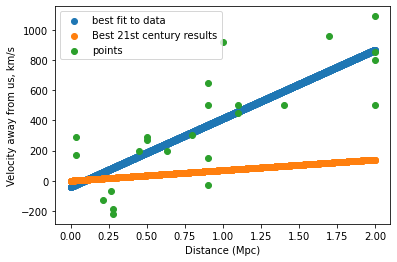

In [14]:
# Estimated value... not very aligned with current best estimates! Note the lack of error bars on the points, so we can't estimate an uncertainty on Hubble's results
# NOT a great thing to do as an experimentalist

import numpy as np
from matplotlib.pyplot import plot,scatter,show,xlabel,ylabel,legend

# distances in Mpc, x
x = np.array([ 0.032, 0.034, 0.214, 0.263, 0.275, 0.275, 0.45, 0.5,
      0.5,   0.63,  0.8,   0.9,   0.9,   0.9,   0.9,  1.0,
      1.1,   1.1,   1.4,   1.7,   2.0,   2.0,   2.0,  2.0 ])

# velocities in km/s, y
y = np.array([ +170, +290, -130, -70,  -185, -220, +200, +290,
      +270, +200, +300, -30,  +650, +150, +500, +920,
      +450, +500, +500, +960, +500, +850, +800, +1090 ])

n = float(len(y))
sum_x2 = np.sum(x*x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x*y)

a = (1./n*sum_xy*sum_x-1./n*sum_y*sum_x2)/(1./n*sum_x*sum_x - sum_x2)
b = (1./n*sum_y*sum_x - sum_xy)/(1./n*sum_x*sum_x - sum_x2)

print("offset = ",a,"and slope, aka Hubble's constant = ",b)
xs = np.arange(0.0, 2.0, 0.001)
ys = a+xs*b
Htoday = 70
ys_new = xs*Htoday
scatter(xs,ys,label="best fit to data")
scatter(xs,ys_new,label="Best 21st century results")
scatter(x,y,label="points")
xlabel("Distance (Mpc)")
ylabel("Velocity away from us, km/s")
legend()
show()

offset (V) =  -1.7312358039813542 and slope = h/e 4.088227358517509e-15
h =  6.549340228345049e-34 Js


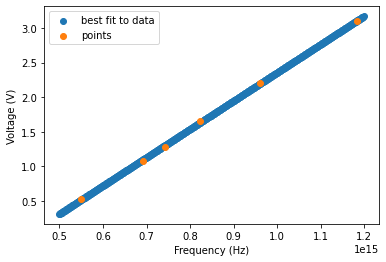

In [19]:
# Problem 3.8
# here we just enter the results manually, it is not so many, but we could also read the text in

import numpy as np
from pylab import scatter,show,xlim,plot

x = np.array([5.4874e+14, 6.931e+14 , 7.4307e+14, 8.2193e+14, 9.6074e+14, 1.184e+15 ])
y = np.array([0.5309,1.0842,1.2734,1.6598,2.19856,3.10891])

n = float(len(y))
sum_x2 = np.sum(x*x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x*y)

a = (1./n*sum_xy*sum_x-1./n*sum_y*sum_x2)/(1./n*sum_x*sum_x - sum_x2)
b = (1./n*sum_y*sum_x - sum_xy)/(1./n*sum_x*sum_x - sum_x2)

print("offset (V) = ",a,"and slope = h/e",b)
print("h = ",b*1.602e-19,"Js")
xs = np.arange(5e14, 1.2e15, 1e12)
ys = a+xs*b
scatter(xs,ys,label="best fit to data",)
scatter(x,y,label="points")
xlabel("Frequency (Hz)")
ylabel("Voltage (V)")
legend()
show()

offset (V) =  -1.6824776749819872 with error =  0.04060651327290789
and slope = h/e 4.023177766178959e-15 with error =  6.253305708761461e-17
h =  6.445130781418693e-34  with error =  1.001779574543586e-35 Js
chi2 per degree of freedom =  1.1290281523118064


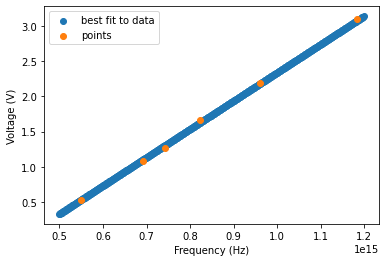

In [20]:
# Problem 3.8 with constant fractional error of 2% on data
# here we just enter the results manually, it is not so many, but we could also read the text in

import numpy as np
from pylab import scatter,show,xlim,plot,xlabel,ylabel,legend
from math import sqrt

x = np.array([5.4874e+14, 6.931e+14 , 7.4307e+14, 8.2193e+14, 9.6074e+14, 1.184e+15 ])
y = np.array([0.5309,1.0842,1.2734,1.6598,2.19856,3.10891])
ey = 0.02 * y

n = float(len(y))
S = np.sum(1./(ey*ey))
Sx = np.sum(x/(ey*ey))
Sy = np.sum(y/(ey*ey))
t = (1./ey)*(x-Sx/S)
Stt = np.sum(t*t)
b = (1./Stt)*np.sum(t*y/ey)
a = (Sy - Sx*b)/S
chi2ndf = (1/(n-2))*np.sum(((y-a-b*x)/ey)*((y-a-b*x)/ey))
ea = sqrt((1/S)*(1+(Sx*Sx)/(S*Stt)))
eb = 1/sqrt(Stt)

print("offset (V) = ",a,"with error = ",ea)
print("and slope = h/e",b,"with error = ",eb)
print("h = ",b*1.602e-19," with error = ",eb*1.602e-19,"Js")
print("chi2 per degree of freedom = ",chi2ndf)
xs = np.arange(5e14, 1.2e15, 1e12)
ys = a+xs*b
scatter(xs,ys,label="best fit to data",)
scatter(x,y,label="points")
xlabel("Frequency (Hz)")
ylabel("Voltage (V)")
legend()
show()

offset (V) =  -1.7285681159005788 with error =  0.06017076763285363
and slope = h/e 4.084489001378239e-15 with error =  7.477645825661545e-17
h =  6.543351380207939e-34  with error =  1.1979188612709796e-35 Js
chi2 per degree of freedom =  0.6367384838876757


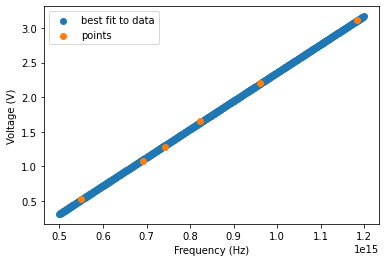

In [25]:
# Problem 3.8 with constant fractional error of 1% on data added in quadrature with 0.03 V
# here we just enter the results manually, it is not so many, but we could also read the text in

import numpy as np
from pylab import scatter,show,xlim,plot,xlabel,ylabel,legend

x = np.array([5.4874e+14, 6.931e+14 , 7.4307e+14, 8.2193e+14, 9.6074e+14, 1.184e+15 ])
y = np.array([0.5309,1.0842,1.2734,1.6598,2.19856,3.10891])
ey = np.sqrt((0.01 * y)*(0.01 * y) + 0.03*0.03)

n = float(len(y))
S = np.sum(1./(ey*ey))
Sx = np.sum(x/(ey*ey))
Sy = np.sum(y/(ey*ey))
t = (1./ey)*(x-Sx/S)
Stt = np.sum(t*t)
b = (1./Stt)*np.sum(t*y/ey)
a = (Sy - Sx*b)/S
chi2ndf = (1/(n-2))*np.sum(((y-a-b*x)/ey)*((y-a-b*x)/ey))
ea = sqrt((1/S)*(1+(Sx*Sx)/(S*Stt)))
eb = 1/sqrt(Stt)

print("offset (V) = ",a,"with error = ",ea)
print("and slope = h/e",b,"with error = ",eb)
print("h = ",b*1.602e-19," with error = ",eb*1.602e-19,"Js")
print("chi2 per degree of freedom = ",chi2ndf)
xs = np.arange(5e14, 1.2e15, 1e12)
ys = a+xs*b
scatter(xs,ys,label="best fit to data",)
scatter(x,y,label="points")
xlabel("Frequency (Hz)")
ylabel("Voltage (V)")
legend()
show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


'/content/drive/My Drive/Colab Notebooks/baseball_stats.csv'
Coefficients =  [-1.72962612e-04  3.56828101e-03  2.34732375e-01]
Max expected batting average at angle of 10.315180130198376  is  0.25313610580910784
If angle is 10 degrees higher expected batting average is  0.23583984456321672 a shift of -0.01729626124589112
If angle is 10 degrees lower expected batting average is  0.23583984456321672 a shift of -0.01729626124589112


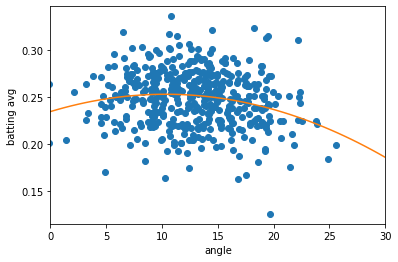

In [8]:
import csv
from matplotlib import pyplot as plt
import numpy as np
!ls "/content/drive/My Drive/Colab Notebooks/baseball_stats.csv"
babip=[]
angle=[]
velocity=[]

with open('/content/drive/My Drive/Colab Notebooks/baseball_stats.csv', newline='') as csvfile:
   spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
   start = True
   for row in spamreader:
       if (start):
               start = False
       elif (row[0] != "null"):
           babip.append(float(row[5]))
           angle.append(float(row[11]))
           velocity.append(float(row[10]))

xmin=0
xmax=30
coefficients=np.polyfit(angle,babip,2)
poly = np.poly1d(coefficients)
new_x = np.linspace(xmin,xmax)
new_y = poly(new_x)
plt.plot(angle,babip,"o",new_x,new_y)
plt.xlim(xmin,xmax)
plt.xlabel("angle")
plt.ylabel("batting avg")
plt.savefig("avg_v_angle.png")
print("Coefficients = ",coefficients)
### a*x*x+b*x+c, derivative = 2ax+b = 0 -> Max avg at x = -b/2a)
bestangle = -coefficients[1]/(2*coefficients[0])
bestavg = coefficients[0]*bestangle*bestangle+coefficients[1]*bestangle+coefficients[2]
avg_up = coefficients[0]*(bestangle+10)*(bestangle+10)+coefficients[1]*(bestangle+10)+coefficients[2]
avg_down = coefficients[0]*(bestangle-10)*(bestangle-10)+coefficients[1]*(bestangle-10)+coefficients[2]

print("Max expected batting average at angle of",bestangle," is ",bestavg)
print("If angle is 10 degrees higher expected batting average is ",avg_up,"a shift of",avg_up-bestavg)
print("If angle is 10 degrees lower expected batting average is ",avg_down,"a shift of",avg_down-bestavg)
